In [12]:
import duckdb
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [13]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = [iris.target_names[i] for i in iris.target]

# 1. SQL na DataFrame
duckdb.query("SELECT species, AVG(\"sepal length (cm)\") AS avg_sepal FROM df GROUP BY species").df()


,species,avg_sepal
0,virginica,6.588
1,setosa,5.006
2,versicolor,5.936


In [ ]:
#Zapytanie wielolinijkowe
query = """
SELECT species,
       AVG("sepal length (cm)") AS avg_sepal,
       COUNT(*) AS count
FROM df
WHERE "petal length (cm)" > 2
GROUP BY species
ORDER BY avg_sepal DESC;
"""

tabela1 = duckdb.query(query).df()
tabela1

,species,avg_sepal,count
0,virginica,6.588,50
1,versicolor,5.936,50


In [4]:
query2 = """
SELECT species, 
"sepal length (cm)" AS sepal, 
"petal length (cm)" AS petal
FROM df
"""

In [5]:
tabela2 = duckdb.query(query2).df()
tabela2

,species,sepal,petal
0,setosa,5.1,1.4
1,setosa,4.9,1.4
2,setosa,4.7,1.3
3,setosa,4.6,1.5
4,setosa,5.0,1.4
...,...,...,...
145,virginica,6.7,5.2
146,virginica,6.3,5.0
147,virginica,6.5,5.2
148,virginica,6.2,5.4


In [6]:
import seaborn as sns

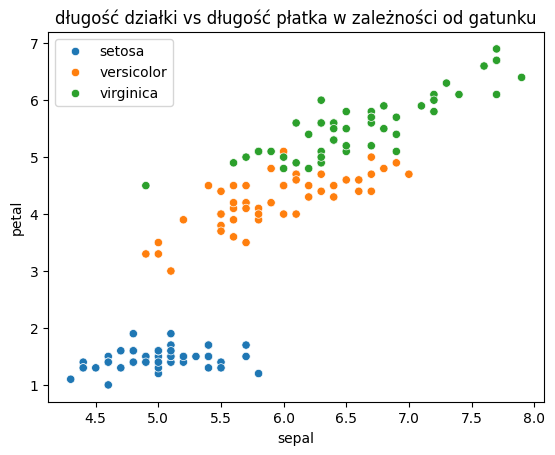

In [7]:
sns.scatterplot(data=tabela2, x="sepal", y="petal", hue="species")
plt.title("długość działki vs długość płatka w zależności od gatunku")
plt.legend()
plt.show()